In [1]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd, seaborn as sns

import sys
sys.path.append('/ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/badran/src/')
import _config

Using data folder:
 /ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/badran/data/


In [10]:
df = pd.read_csv(_config.DATA_DIR + f'Badran_Illumina_SNP_timepts.csv')

In [15]:
df['Frequency'] = df['SNP.Reads'] / df['Read.Depth']

df['SNP name'] = df['WT'] + df['Position'].astype(str) + df['SNP']

cols = [
    'Time',
    'Frequency',
    'SNP name',
]

dfs = df[cols]

pv_df = dfs.pivot(index = 'SNP name', columns = 'Time', values = 'Frequency')

pv_df.to_csv(_config.DATA_DIR + f'Badran_Illumina_SNPs_pivot.csv')

## analysis

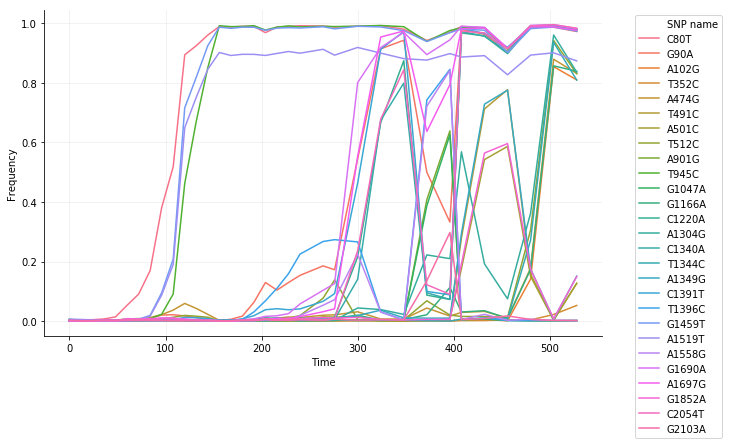

In [14]:
fig, ax = plt.subplots(figsize = (10, 6))

sns.lineplot(
    x = 'Time',
    y = 'Frequency',
    hue = 'SNP name',
    data = dfs,
    ax = ax,
)
plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.grid(alpha = 0.2)
sns.despine()